## Problem statement: What is the regional youth unemployment rate forecast? 

# Data description:
Country Name
Description: The full name of the country or region.
Example: "United States", "India", "Brazil"
    
Country Code
Description: A standardized code representing the country or region, typically following ISO 3166-1 alpha-3 codes or a similar standard.
Example: "USA", "IND", "BRA"
    
Indicator Name
Description: The name of the indicator being measured. This could represent economic metrics, social indicators, environmental factors, etc.
Example: "Unemployment, youth total (% of total labour forces ages 15-24)"
    
Indicator Code
Description: A unique code associated with the indicator, used for identification and analysis purposes.
Example: "SL.UEM.1524.ZS
    
Years (1991, 1992, 1993, ... 2021, 2022)
Description: These columns represent the value of the indicator for each respective year. Each column corresponds to a specific year, ranging from 1991 to 2022.

In [49]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [7]:
# Specify the path to your CSV file with correctly enclosed quotes
file_path = 'regional1.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,13.315759,13.261782,13.166145,13.043362,12.946585,12.992908,...,13.102415,12.992790,12.874319,13.007650,12.973653,12.887711,13.281005,14.138644,14.137466,14.134125
2,Afghanistan,AFG,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,12.413000,12.386000,12.265000,12.183000,12.272000,12.102000,...,10.224000,10.086000,12.495000,14.902000,17.303000,17.292000,17.339000,16.053000,NaN,NaN
3,Africa Western and Central,AFW,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,8.425670,8.560547,8.601479,8.576438,8.531724,8.553644,...,8.084479,8.432707,8.860586,8.690286,8.785932,8.910159,9.005565,10.444833,9.874787,9.726148
4,Angola,AGO,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,9.573000,9.599000,9.707000,9.489000,9.353000,9.308000,...,16.595000,16.428000,16.437000,16.436000,16.363000,16.343000,16.283000,17.967000,17.523000,17.279000


In [8]:
#describe the data
df.describe()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,...,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,233.000000,229.000000
mean,14.095073,14.719187,15.554556,15.866574,16.161568,16.484979,16.333748,16.348950,16.716070,16.492042,...,17.819578,17.593888,17.424687,17.234630,16.777949,16.315179,15.977807,18.524154,17.514815,16.492438
std,10.652846,11.067292,11.164207,11.031583,11.273403,11.349481,10.964452,10.837711,10.935716,11.118664,...,12.413791,12.196480,11.803934,11.432085,11.063414,10.870708,10.487762,11.275198,10.942980,10.812013
min,1.229000,1.343000,1.362000,1.186000,1.384000,1.340000,1.249000,1.171000,1.081000,0.994000,...,0.772000,0.670000,0.574000,0.484000,0.380000,0.405000,0.421000,0.494000,0.514000,0.304000
25%,5.553000,6.211702,7.257500,7.722000,7.613129,8.217000,7.828000,8.630090,8.953565,8.716500,...,9.355500,9.280000,9.334500,9.268500,9.058000,8.770000,8.951282,10.956500,9.928000,8.875000
50%,11.147000,11.388783,11.667000,12.200000,12.946585,13.536000,13.833000,13.448201,13.883000,12.970820,...,15.473000,14.963000,15.011359,14.927000,14.392000,13.592000,13.281005,15.882000,15.205831,13.635000
75%,19.424500,20.536022,22.560500,22.405000,22.223613,22.552893,22.559000,22.999082,23.270989,22.301502,...,23.711500,23.600122,22.385000,22.755579,21.873500,21.370370,20.740000,24.224000,22.753000,21.899000
max,52.387000,52.540000,53.325000,53.616000,63.324000,68.956000,63.674000,61.352000,57.972000,57.957000,...,70.508000,71.297000,72.208000,73.052000,74.036000,73.893000,73.910000,78.778000,77.034000,77.194000


In [9]:
# Check for null values in each column
null_summary = df.isnull().sum()

# Display the count of null values per column
print("Null values per column:")
print(null_summary)

# Check if any null values exist in the entire DataFrame
total_nulls = df.isnull().sum().sum()
print(f"Total number of null values in the DataFrame: {total_nulls}")

Null values per column:
Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
1991              31
1992              31
1993              31
1994              31
1995              31
1996              31
1997              31
1998              31
1999              31
2000              31
2001              31
2002              31
2003              31
2004              31
2005              31
2006              31
2007              31
2008              31
2009              31
2010              31
2011              31
2012              31
2013              31
2014              31
2015              31
2016              31
2017              31
2018              31
2019              31
2020              31
2021              33
2022              37
dtype: int64
Total number of null values in the DataFrame: 1000


In [10]:
# Get the number of rows
num_rows = df.shape[0]

print(f"Number of rows: {num_rows}")

Number of rows: 266


In [11]:
threshold = 0.5  # drop rows with more than 50% NaNs
df_cleaned = df.dropna(thresh=int(threshold * len(df.columns)))

In [12]:
# Get the number of rows
num_rows = df_cleaned.shape[0]

print(f"Number of rows: {num_rows}")
#we removed 31 rows

Number of rows: 235


In [13]:
# Check for null values in each column
null_summary = df_cleaned.isnull().sum()

# Display the count of null values per column
print("Null values per column:")
print(null_summary)

# Check if any null values exist in the entire DataFrame
total_nulls = df_cleaned.isnull().sum().sum()
print(f"Total number of null values in the DataFrame: {total_nulls}")

Null values per column:
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1991              0
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
2021              2
2022              6
dtype: int64
Total number of null values in the DataFrame: 8


In [14]:
df_interpolated = df_cleaned.interpolate(method='linear')
df_interpolated = df_cleaned.interpolate(method='polynomial', order=2)
df_interpolated.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,Africa Eastern and Southern,AFE,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,13.315759,13.261782,13.166145,13.043362,12.946585,12.992908,...,13.102415,12.992790,12.874319,13.007650,12.973653,12.887711,13.281005,14.138644,14.137466,14.134125
2,Afghanistan,AFG,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,12.413000,12.386000,12.265000,12.183000,12.272000,12.102000,...,10.224000,10.086000,12.495000,14.902000,17.303000,17.292000,17.339000,16.053000,8.727322,8.557613
3,Africa Western and Central,AFW,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,8.425670,8.560547,8.601479,8.576438,8.531724,8.553644,...,8.084479,8.432707,8.860586,8.690286,8.785932,8.910159,9.005565,10.444833,9.874787,9.726148
4,Angola,AGO,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,9.573000,9.599000,9.707000,9.489000,9.353000,9.308000,...,16.595000,16.428000,16.437000,16.436000,16.363000,16.343000,16.283000,17.967000,17.523000,17.279000
5,Albania,ALB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,16.739000,48.366000,40.522000,33.520000,23.545000,22.505000,...,31.318000,39.744000,39.874000,36.172000,31.403000,28.305000,27.161000,30.846000,29.505000,27.788000


In [15]:
df = df_interpolated

In [16]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

#no duplicates

Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Index: []

[0 rows x 36 columns]


In [17]:
df.columns = df.columns.astype(str)  # Ensure all column names are strings

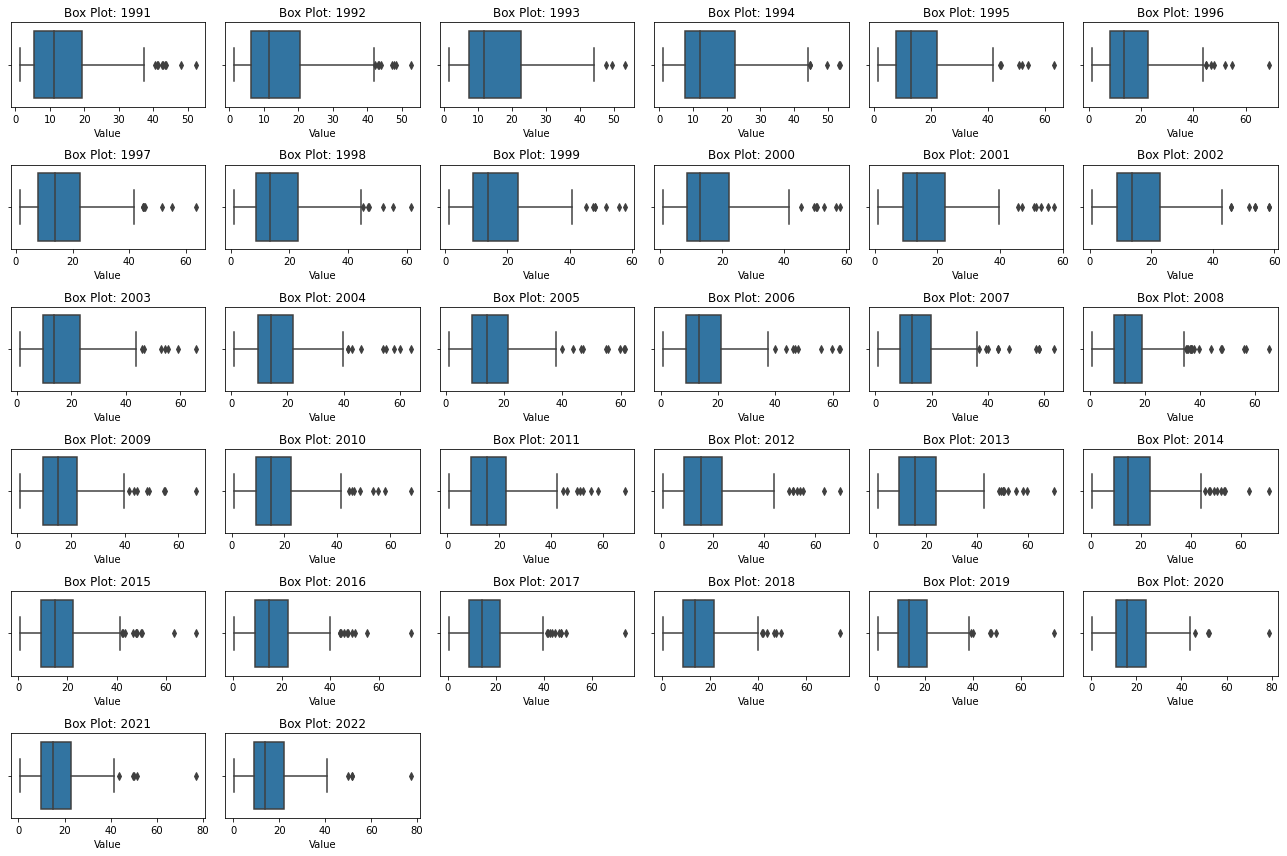

In [18]:


# List of year columns as strings
year_columns = [str(year) for year in range(1991, 2023)]

plt.figure(figsize=(18, 12))
for i, year in enumerate(year_columns):
    plt.subplot(6, 6, i + 1)  # Adjust the number of rows and columns as needed
    sns.boxplot(x=df[year].dropna())
    plt.title(f'Box Plot: {year}')
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

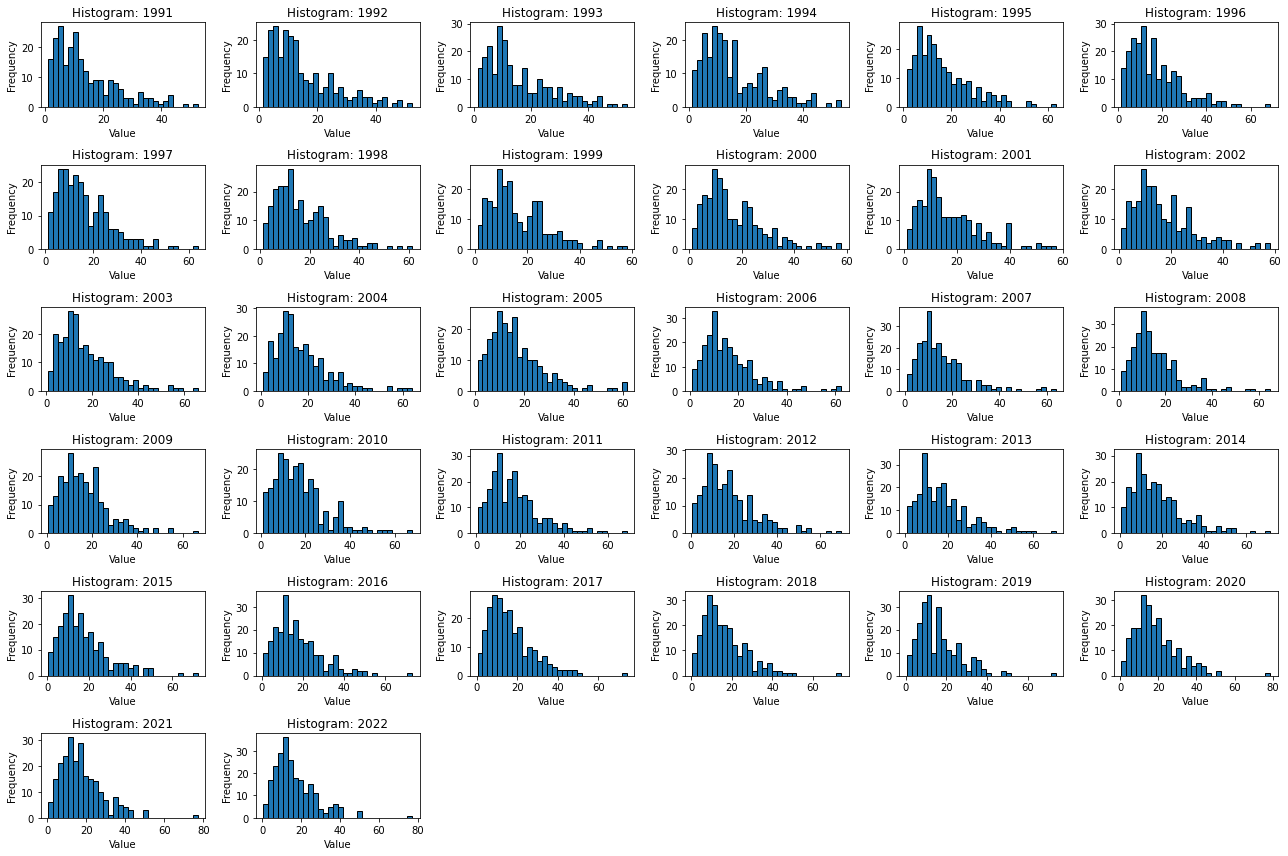

In [19]:
plt.figure(figsize=(18, 12))
for i, year in enumerate(year_columns):
    plt.subplot(6, 6, i + 1)  # Adjust the number of rows and columns as needed
    plt.hist(df[year].dropna(), bins=30, edgecolor='k')
    plt.title(f'Histogram: {year}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Regional unemployment rates in 2022


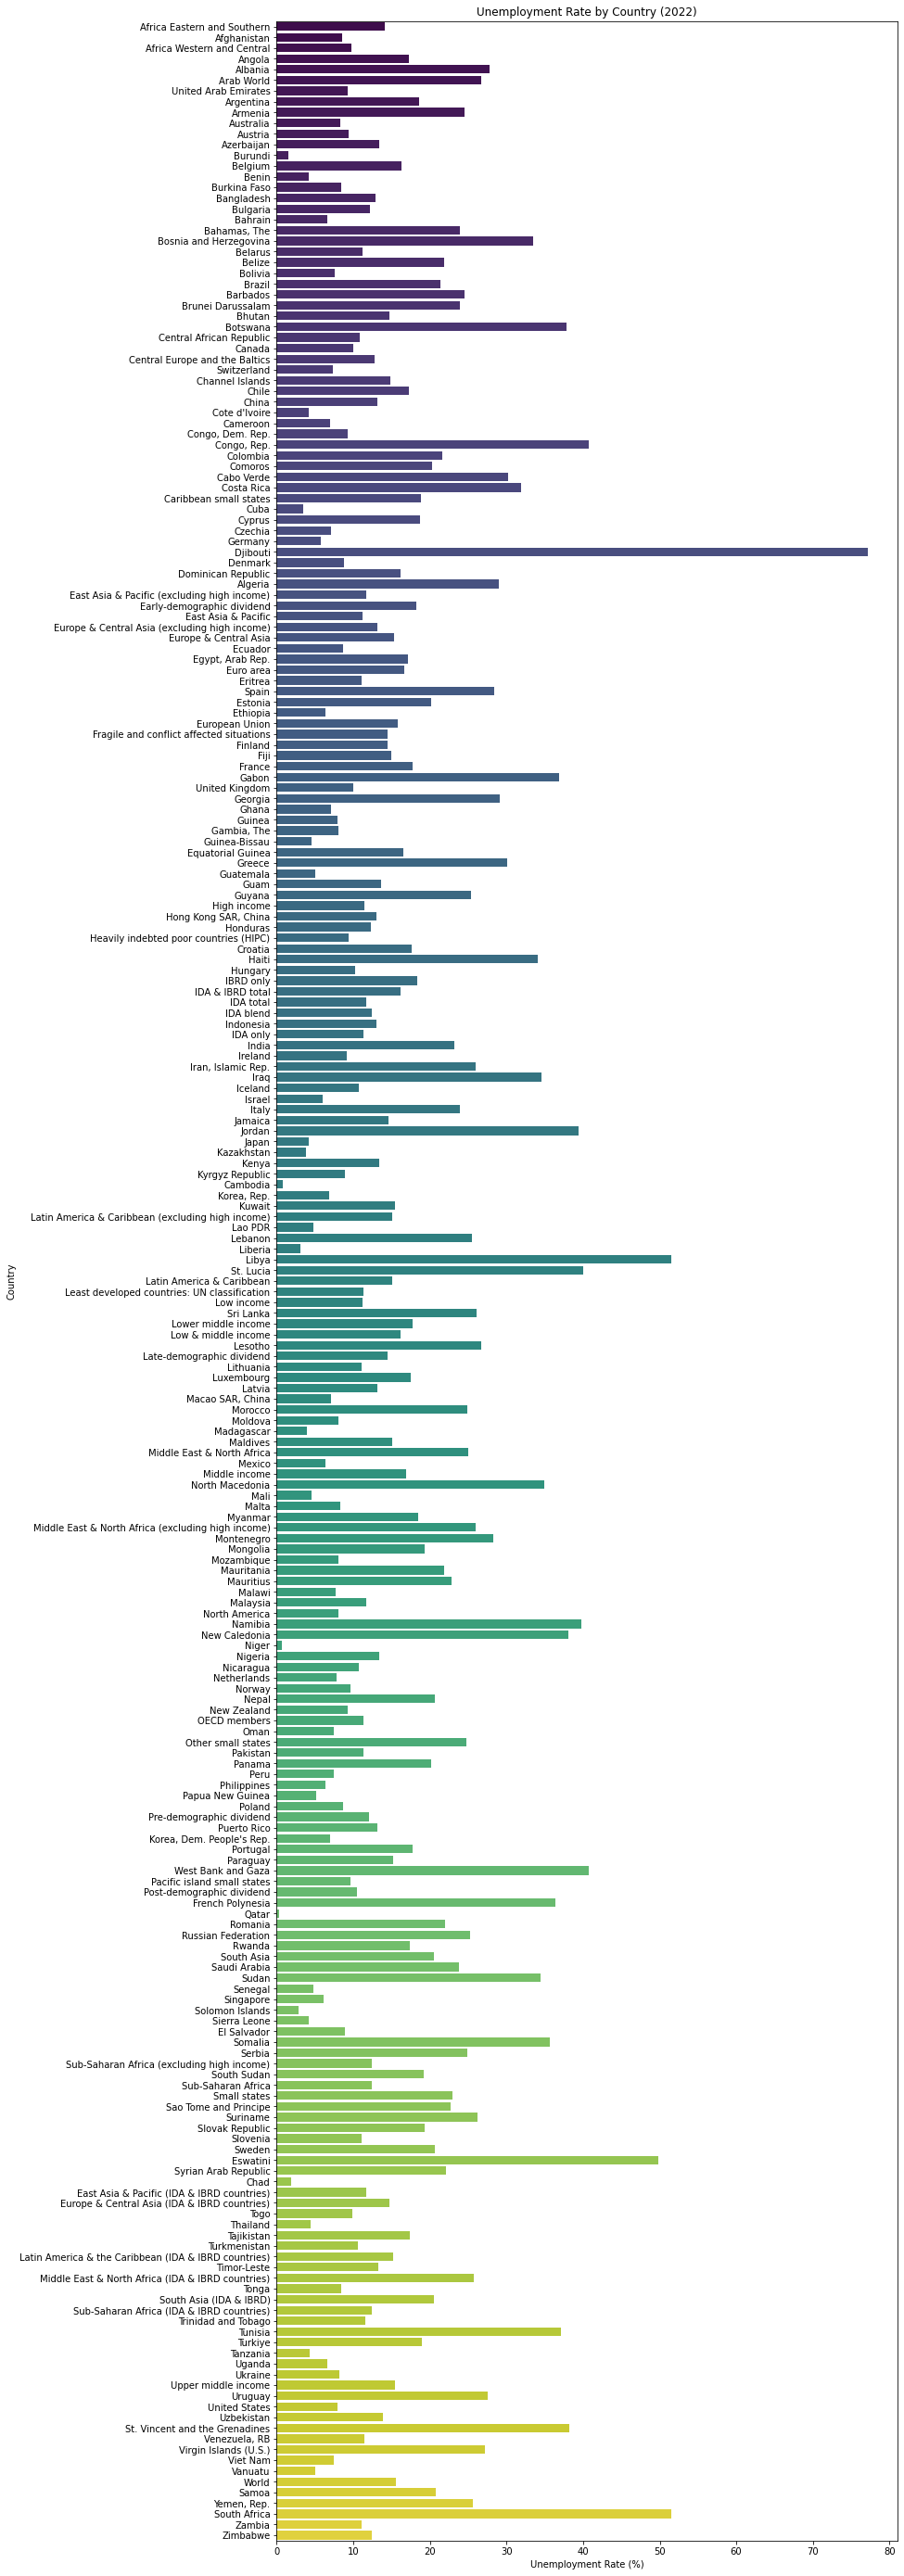

In [20]:
print("Regional unemployment rates in 2022")
# Extract relevant columns for 2022
df_2022 = df[['Country Name', '2022']].copy()

# Rename columns for clarity
df_2022.columns = ['Country', 'Unemployment Rate']
plt.figure(figsize=(12, 50))
sns.barplot(data=df_2022, x='Unemployment Rate', y='Country', palette='viridis')
plt.title('Unemployment Rate by Country (2022)')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Country')
plt.show()


# Input country name here: 

## we will create a new dataframe containing the specific region that we are working with

In [24]:
#we now want to filter out unemployment rate by region, we choose south africa as an example but any region can be used.
#Step 1: Filter Data for South Africa
south_africa_df = df[df['Country Name'] == 'South Africa']

# Drop unnecessary columns
south_africa_df = south_africa_df.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])

# Step 2: Reshape the DataFrame to long format
south_africa_long = south_africa_df.melt(var_name='Year', value_name='Unemployment Rate')

# Rename columns to fit Prophet's requirements
south_africa_long.rename(columns={'Year': 'ds', 'Unemployment Rate': 'y'}, inplace=True)

# Convert 'ds' to datetime format (using January 1st as the date)
south_africa_long['ds'] = pd.to_datetime(south_africa_long['ds'], format='%Y')
south_africa_long.head()

,ds,y
0,1991-01-01,34.339
1,1992-01-01,34.792
2,1993-01-01,34.963
3,1994-01-01,35.160
4,1995-01-01,35.398


In [25]:
dfcopy= south_africa_long.copy()
dfcopy2= south_africa_long.copy()

In [26]:
print(south_africa_long.columns)
print(dfcopy.columns)


Index(['ds', 'y'], dtype='object')
Index(['ds', 'y'], dtype='object')


## Starting with a simple linear regression model

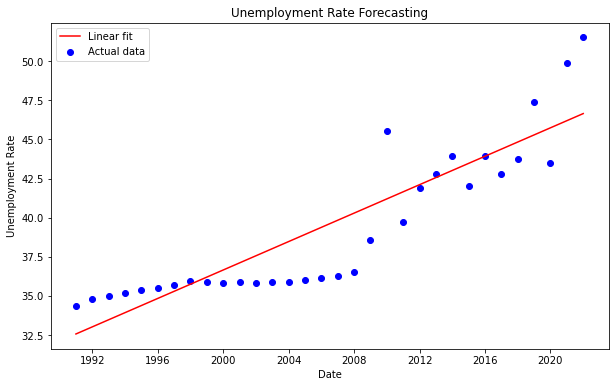

In [28]:
df = south_africa_long

# Convert date to ordinal for linear regression
df['ds'] = pd.to_datetime(df['ds'])
df['ds_ordinal'] = df['ds'].map(pd.Timestamp.toordinal)

# Features and target variable
X = df[['ds_ordinal']]
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(df['ds'], df['y'], color='blue', label='Actual data')
plt.plot(df['ds'], model.predict(df[['ds_ordinal']]), color='red', label='Linear fit')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Forecasting')
plt.legend()
plt.show()


## We now add a 5 year prediction with mse as a measure of accuracy

Mean Squared Error: 6.592861826069243


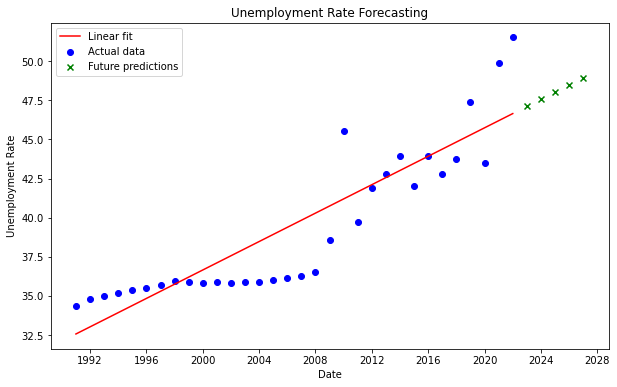

          ds     y_pred
0 2023-01-01  47.107544
1 2024-01-01  47.561712
2 2025-01-01  48.017123
3 2026-01-01  48.471291
4 2027-01-01  48.925458


In [29]:
df = south_africa_long

# Convert date to ordinal for linear regression
df['ds'] = pd.to_datetime(df['ds'])
df['ds_ordinal'] = df['ds'].map(pd.Timestamp.toordinal)

# Features and target variable
X = df[['ds_ordinal']]
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Predicting for the next 5 years
future_years = pd.date_range(df['ds'].max() + pd.DateOffset(years=1), periods=5, freq='YS')
future_ordinal = future_years.map(pd.Timestamp.toordinal)
future_ordinal = np.array(future_ordinal).reshape(-1, 1)

# Predicting future values
future_predictions = model.predict(future_ordinal)

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'ds': future_years, 'y_pred': future_predictions})

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(df['ds'], df['y'], color='blue', label='Actual data')
plt.plot(df['ds'], model.predict(df[['ds_ordinal']]), color='red', label='Linear fit')
plt.scatter(future_df['ds'], future_df['y_pred'], color='green', marker='x', label='Future predictions')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Forecasting')
plt.legend()
plt.show()

# Display future predictions
print(future_df)

Mean Squared Error: 6.592861826069243


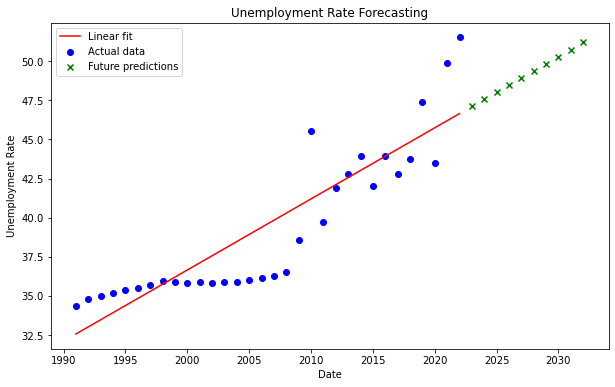

          ds     y_pred
0 2023-01-01  47.107544
1 2024-01-01  47.561712
2 2025-01-01  48.017123
3 2026-01-01  48.471291
4 2027-01-01  48.925458
5 2028-01-01  49.379625
6 2029-01-01  49.835037
7 2030-01-01  50.289204
8 2031-01-01  50.743372
9 2032-01-01  51.197539


In [37]:
#what about 10 years forecast?

df = south_africa_long

# Convert date to ordinal for linear regression
df['ds'] = pd.to_datetime(df['ds'])
df['ds_ordinal'] = df['ds'].map(pd.Timestamp.toordinal)

# Features and target variable
X = df[['ds_ordinal']]
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Predicting for the next 10 years
future_years = pd.date_range(df['ds'].max() + pd.DateOffset(years=1), periods=10, freq='YS')
future_ordinal = future_years.map(pd.Timestamp.toordinal)
future_ordinal = np.array(future_ordinal).reshape(-1, 1)

# Predicting future values
future_predictions = model.predict(future_ordinal)

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'ds': future_years, 'y_pred': future_predictions})

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(df['ds'], df['y'], color='blue', label='Actual data')
plt.plot(df['ds'], model.predict(df[['ds_ordinal']]), color='red', label='Linear fit')
plt.scatter(future_df['ds'], future_df['y_pred'], color='green', marker='x', label='Future predictions')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Forecasting')
plt.legend()
plt.show()

# Display future predictions
print(future_df)

### The linear regression model has a mse value of 6.59, this value is okay but we can improve it. The lower the mse, the more accurate the model is

### Based off our linear regression model, South African unemployment rates are due for a linear increase, peaking at 52% in 2032.

Mean Squared Error: 3.1326904285714234


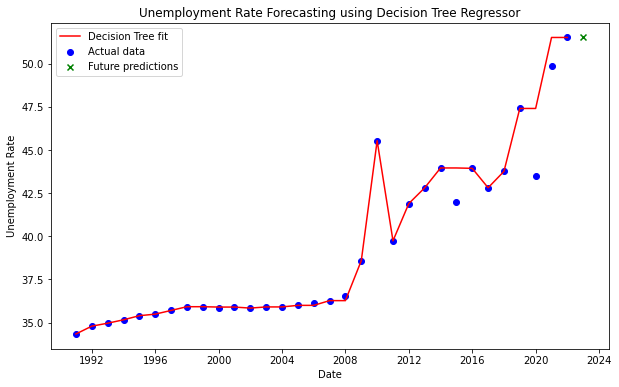

          ds  y_pred
0 2023-01-01  51.519


In [38]:
#mse for linear regression was 6.59, quite high, lets try decision tree model

df = south_africa_long

# Convert date to ordinal for regression
df['ds'] = pd.to_datetime(df['ds'])
df['ds_ordinal'] = df['ds'].map(pd.Timestamp.toordinal)

# Features and target variable
X = df[['ds_ordinal']]
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the decision tree regressor model
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Predicting for the next 5 years
future_years = pd.date_range(df['ds'].max() + pd.DateOffset(years=1), periods=1, freq='YS')
future_ordinal = future_years.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

# Predicting future values
future_predictions = model.predict(future_ordinal)

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'ds': future_years, 'y_pred': future_predictions})

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(df['ds'], df['y'], color='blue', label='Actual data')
plt.plot(df['ds'], model.predict(df[['ds_ordinal']]), color='red', label='Decision Tree fit')
plt.scatter(future_df['ds'], future_df['y_pred'], color='green', marker='x', label='Future predictions')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Forecasting using Decision Tree Regressor')
plt.legend()
plt.show()

# Display future predictions
print(future_df)




## Decision tree model: the mse halved, which is good. Lets try a random forest model

Mean Squared Error: 2.248729494314262


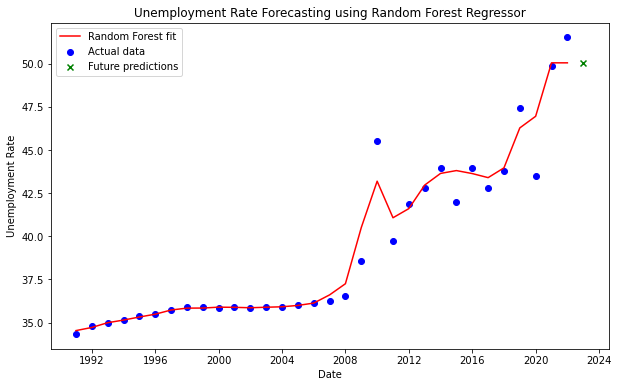

          ds    y_pred
0 2023-01-01  50.04901


In [41]:
df = south_africa_long

# Convert date to ordinal for regression
df['ds'] = pd.to_datetime(df['ds'])
df['ds_ordinal'] = df['ds'].map(pd.Timestamp.toordinal)

# Features and target variable
X = df[['ds_ordinal']]
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Predicting for the next year

future_years = pd.date_range(df['ds'].max() + pd.DateOffset(years=1), periods=1, freq='YS')
future_ordinal = future_years.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

# Predicting future values
future_predictions = model.predict(future_ordinal)

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'ds': future_years, 'y_pred': future_predictions})

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(df['ds'], df['y'], color='blue', label='Actual data')
plt.plot(df['ds'], model.predict(df[['ds_ordinal']]), color='red', label='Random Forest fit')
plt.scatter(future_df['ds'], future_df['y_pred'], color='green', marker='x', label='Future predictions')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Forecasting using Random Forest Regressor')
plt.legend()
plt.show()

# Display future predictions
print(future_df)

### The random forest model has an mse of 2.25, which is very good accuracy. However, As you may notice,our random forest and decision tree predictions are only for one point forward. This is because of the plateau nature of Decision tree and random forest models. Piecewise Constant Nature: Random Forest predictions are constant within each leaf node of the individual decision trees. When forecasting for new data points that fall outside the range of training data, the model may assign these points to a leaf node where the prediction is similar or identical to previous predictions, leading to a plateau. Lack of Extrapolation: Tree-based models are generally not good at extrapolation. If the model encounters a date (or ordinal number) outside the range of the training data, it cannot predict a trend or linear progression into the future. Instead, it tends to predict the same or similar value as the closest data it has seen before.

C:\Users\Wits-User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Wits-User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Wits-User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Mean Squared Error: 9.947520452221855

Forecasted Values:
                   ds   Forecast
2016-01-01 2016-01-01  42.895882
2017-01-01 2017-01-01  43.478364
2018-01-01 2018-01-01  44.906312
2019-01-01 2019-01-01  43.721497
2020-01-01 2020-01-01  44.266534
2021-01-01 2021-01-01  44.849016
2022-01-01 2022-01-01  46.276964


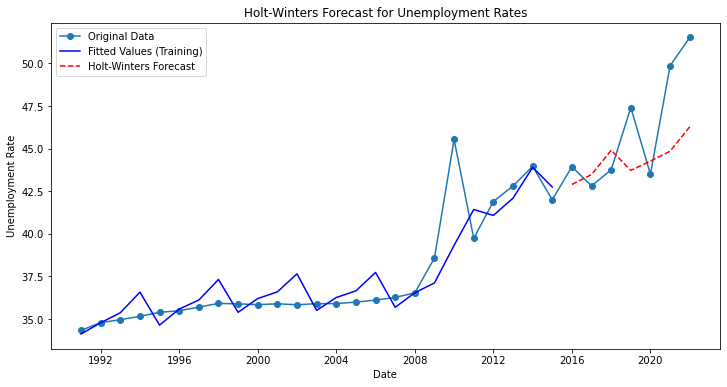

In [42]:
df=south_africa_long

# Convert 'ds' to datetime format if it's not already
df['ds'] = pd.to_datetime(df['ds'])

# Set the index to 'ds' for time series analysis
df.set_index('ds', inplace=True)

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Define the Holt-Winters model with trend and seasonal components
model = ExponentialSmoothing(train['y'], trend='add', seasonal='add', seasonal_periods=4)  # Adjust seasonal_periods as needed

# Fit the model
fit = model.fit()

# Make forecasts on the test set
forecast = fit.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test['y'], forecast)
print(f'Mean Squared Error: {mse}')

# Print predicted values
print("\nForecasted Values:")
forecast_df = pd.DataFrame({
    'ds': test.index,
    'Forecast': forecast
})
print(forecast_df)

# Combine original data with forecasted data for plotting
forecast_df.set_index('ds', inplace=True)
combined_df = pd.concat([train, forecast_df], axis=0)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['y'], label='Original Data', marker='o')
plt.plot(train.index, fit.fittedvalues, label='Fitted Values (Training)', linestyle='-', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Holt-Winters Forecast', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Holt-Winters Forecast for Unemployment Rates')
plt.legend()
plt.show()


### Here we trained a Holt-winters model which is interesting but the accuracy is than the linear regression threshold.

SVR Mean Squared Error: 3.3666798779205935

Actual vs Predicted Values:
Actual: 43.499, Predicted: 47.92292878794902
Actual: 36.115, Predicted: 36.25749513357369
Actual: 41.999, Predicted: 43.59494361337823
Actual: 36.536, Predicted: 37.67758889993417
Actual: 35.894, Predicted: 36.03121771230603
Actual: 35.846, Predicted: 36.0503537183714
Actual: 49.864, Predicted: 49.610114228067914


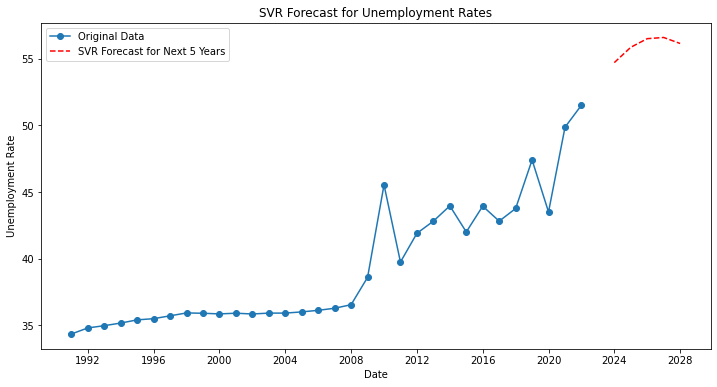


Future Forecasts:
          ds          y
0 2023-12-31  54.714894
1 2024-12-31  55.866380
2 2025-12-31  56.511564
3 2026-12-31  56.602098
4 2027-12-31  56.150840


In [50]:
#5 year forecast svr model

df = dfcopy

# Convert 'ds' to datetime format and then to ordinal for SVR
df['ds'] = pd.to_datetime(df['ds'])
df['ds_ordinal'] = df['ds'].map(pd.Timestamp.toordinal)

# Features and target variable
X = df[['ds_ordinal']]
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Initialize and train SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'SVR Mean Squared Error: {mse}')

# Print actual vs predicted values
print("\nActual vs Predicted Values:")
for actual, predicted in zip(y_test, y_pred):
    print(f'Actual: {actual}, Predicted: {predicted}')

# Forecast future values for the next 5 years
future_years = pd.date_range(start=df['ds'].max() + pd.DateOffset(years=1), periods=5, freq='Y')
future_years_ordinal = future_years.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
future_years_scaled = scaler_X.transform(future_years_ordinal)
future_forecast = svr_model.predict(future_years_scaled)

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'ds': future_years, 'y': future_forecast})

# Combine original data with forecasted data
combined_df = pd.concat([df[['ds', 'y']], future_df], ignore_index=True)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(dfcopy['ds'], df['y'], label='Original Data', marker='o')
plt.plot(future_df['ds'], future_df['y'], label='SVR Forecast for Next 5 Years', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('SVR Forecast for Unemployment Rates')
plt.legend()
plt.show()

# Print future forecasts
print("\nFuture Forecasts:")
print(future_df)

### Our final and best train was the SVR model with an mse value of 3.37. In the plot above, we visualized a 5 year prediction

SVR Mean Squared Error: 3.3666798779205935

Actual vs Predicted Values:
Actual: 43.499, Predicted: 47.92292878794902
Actual: 36.115, Predicted: 36.25749513357369
Actual: 41.999, Predicted: 43.59494361337823
Actual: 36.536, Predicted: 37.67758889993417
Actual: 35.894, Predicted: 36.03121771230603
Actual: 35.846, Predicted: 36.0503537183714
Actual: 49.864, Predicted: 49.610114228067914


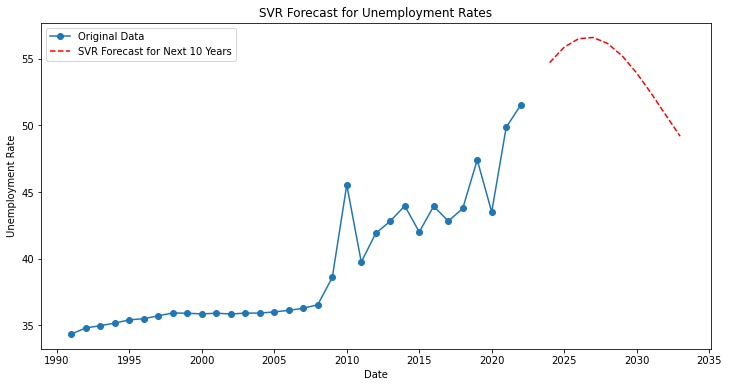


Future Forecasts:
          ds          y
0 2023-12-31  54.714894
1 2024-12-31  55.866380
2 2025-12-31  56.511564
3 2026-12-31  56.602098
4 2027-12-31  56.150840
5 2028-12-31  55.224175
6 2029-12-31  53.937230
7 2030-12-31  52.418212
8 2031-12-31  50.798071
9 2032-12-31  49.188551


In [52]:
#what about 10 year forecast svr model?

dfcopy = dfcopy2
# Convert 'ds' to datetime format and then to ordinal for SVR
dfcopy['ds'] = pd.to_datetime(dfcopy['ds'])
dfcopy['ds_ordinal'] = dfcopy['ds'].map(pd.Timestamp.toordinal)

# Features and target variable
X = dfcopy[['ds_ordinal']]
y = dfcopy['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Initialize and train SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'SVR Mean Squared Error: {mse}')

# Print actual vs predicted values
print("\nActual vs Predicted Values:")
for actual, predicted in zip(y_test, y_pred):
    print(f'Actual: {actual}, Predicted: {predicted}')

# Forecast future values for the next 10 years
future_years = pd.date_range(start=dfcopy['ds'].max() + pd.DateOffset(years=1), periods=10, freq='Y')
future_years_ordinal = future_years.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
future_years_scaled = scaler_X.transform(future_years_ordinal)
future_forecast = svr_model.predict(future_years_scaled)

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'ds': future_years, 'y': future_forecast})

# Combine original data with forecasted data
combined_df = pd.concat([dfcopy[['ds', 'y']], future_df], ignore_index=True)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(dfcopy['ds'], dfcopy['y'], label='Original Data', marker='o')
plt.plot(future_df['ds'], future_df['y'], label='SVR Forecast for Next 10 Years', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('SVR Forecast for Unemployment Rates')
plt.legend()
plt.show()

# Print future forecasts
print("\nFuture Forecasts:")
print(future_df)

### We can see that the svr model differs from the linear regression model predictions. The svr model has an mse of 3.37 while linear regression only had an mse of 6.59. The SVR model has better accuracy.

Overall, the linear regression model predicted an unemployment rate just over 50% in south Africa by 2030, while the SVR model predicted an unemployment rate of 52%